In [1]:
import pandas as pd
from pandas import DataFrame
from pandas import read_csv, pivot_table
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
train = pd.read_csv('train.csv', index_col='id')
test = pd.read_csv('test.csv', index_col='id')
submission = pd.read_csv('submission.csv')
print(train.shape, test.shape, submission.shape)

(262, 20) (175, 19) (175, 2)


In [3]:
# 데이터 확인
print(train.head(3))
print(test.head(3))
print(submission.head(3))

           father  mother  gender  trait SNP_01 SNP_02 SNP_03 SNP_04 SNP_05  \
id                                                                            
TRAIN_000       0       0       0      2    G G    A G    A A    G A    C A   
TRAIN_001       0       0       0      2    A G    A G    C A    A A    A A   
TRAIN_002       0       0       0      2    G G    G G    A A    G A    C C   

          SNP_06 SNP_07 SNP_08 SNP_09 SNP_10 SNP_11 SNP_12 SNP_13 SNP_14  \
id                                                                         
TRAIN_000    A A    A A    G G    A A    G G    A G    A A    A A    A A   
TRAIN_001    A G    A A    G A    A A    A G    A A    G A    G G    A A   
TRAIN_002    G G    A A    G A    G A    A G    A A    A A    A A    A A   

          SNP_15 class  
id                      
TRAIN_000    A A     B  
TRAIN_001    A A     C  
TRAIN_002    A A     B  
          father  mother  gender  trait SNP_01 SNP_02 SNP_03 SNP_04 SNP_05  \
id                  

In [4]:
print(train[['SNP_07']].value_counts())
# print(train[['SNP_08']].value_counts())
# print(train[['SNP_09']].value_counts())
# print(train[['SNP_10']].value_counts())
# print(train[['SNP_11']].value_counts())
print(train[['SNP_03']].value_counts())
print(train[['SNP_05']].value_counts())
print(train[['class']].value_counts())
print(train[['SNP_05']])

SNP_07
A A       163
G G        51
G A        48
Name: count, dtype: int64
SNP_03
A A       122
C A        92
C C        48
Name: count, dtype: int64
SNP_05
A A       94
C A       86
C C       82
Name: count, dtype: int64
class
B        114
C         79
A         69
Name: count, dtype: int64
          SNP_05
id              
TRAIN_000    C A
TRAIN_001    A A
TRAIN_002    C C
TRAIN_003    A A
TRAIN_004    C C
...          ...
TRAIN_257    C C
TRAIN_258    A A
TRAIN_259    A A
TRAIN_260    A A
TRAIN_261    C C

[262 rows x 1 columns]


In [5]:
# def labeling(x, label):
#     encoder = LabelEncoder()
#     encoder.fit(x)
#     label = encoder.transform(x)
#     return label

num_cols = train.select_dtypes(include='object')
a = list(num_cols.columns)
# a.remove('id')
a.remove('class')
print(a)
# df = labeling(num_cols, label)

['SNP_01', 'SNP_02', 'SNP_03', 'SNP_04', 'SNP_05', 'SNP_06', 'SNP_07', 'SNP_08', 'SNP_09', 'SNP_10', 'SNP_11', 'SNP_12', 'SNP_13', 'SNP_14', 'SNP_15']


In [6]:
print(train[['SNP_07']])
# 1 띄어쓰기 없애기
# 2 소문자로 만들기
# 3 경우의 수 라벨링하기 AA = 1 AG =2 GA =3 GG = 4, CC = 5, CA = 6 , AC = 7, 

          SNP_07
id              
TRAIN_000    A A
TRAIN_001    A A
TRAIN_002    A A
TRAIN_003    G G
TRAIN_004    A A
...          ...
TRAIN_257    A A
TRAIN_258    G A
TRAIN_259    G G
TRAIN_260    G G
TRAIN_261    A A

[262 rows x 1 columns]


In [7]:
for i in a: 
    train[i] = train[i].str.replace(' ','')
    train.loc[train[i]=='AA',i]=1
    train.loc[train[i]=='AG',i]=2
    train.loc[train[i]=='GA',i]=3
    train.loc[train[i]=='GG',i]=4
    train.loc[train[i]=='CC',i]=5
    train.loc[train[i]=='CA',i]=6
    train.loc[train[i]=='AC',i]=7
train.loc[train['class']=='A','class']=0
train.loc[train['class']=='B','class']=1
train.loc[train['class']=='C','class']=2
train

,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,SNP_06,SNP_07,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15,class
id,,,,,,,,,,,,,,,,,,,,
TRAIN_000,0,0,0,2,4,2,1,3,6,1,1,4,1,4,2,1,1,1,1,1
TRAIN_001,0,0,0,2,2,2,6,1,1,2,1,3,1,2,1,3,4,1,1,2
TRAIN_002,0,0,0,2,4,4,1,3,5,4,1,3,3,2,1,1,1,1,1,1
TRAIN_003,0,0,0,1,1,4,1,3,1,4,4,1,4,2,4,4,4,1,4,0
TRAIN_004,0,0,0,2,4,4,5,1,5,1,1,1,1,4,1,1,2,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TRAIN_257,0,0,0,2,2,2,1,3,5,2,1,3,1,4,2,3,1,1,1,1
TRAIN_258,0,0,0,2,4,1,6,1,1,2,3,3,1,2,2,1,2,1,3,2
TRAIN_259,0,0,0,1,2,4,1,3,1,2,4,3,3,1,4,4,4,6,4,0


In [8]:
print(train[['SNP_07']].value_counts())
print(train[['SNP_08']].value_counts())
print(train[['SNP_09']].value_counts())
print(train[['SNP_10']].value_counts())
print(train[['SNP_11']].value_counts())
print(train[['SNP_03']].value_counts())
print(train[['SNP_05']].value_counts())

SNP_07
1         163
4          51
3          48
Name: count, dtype: int64
SNP_08
3         96
1         87
4         79
Name: count, dtype: int64
SNP_09
1         182
3          56
4          24
Name: count, dtype: int64
SNP_10
4         151
2          68
1          43
Name: count, dtype: int64
SNP_11
2         96
1         83
4         83
Name: count, dtype: int64
SNP_03
1         122
6          92
5          48
Name: count, dtype: int64
SNP_05
1         94
6         86
5         82
Name: count, dtype: int64


In [9]:
train = train.astype(int)

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 262 entries, TRAIN_000 to TRAIN_261
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   father  262 non-null    int32
 1   mother  262 non-null    int32
 2   gender  262 non-null    int32
 3   trait   262 non-null    int32
 4   SNP_01  262 non-null    int32
 5   SNP_02  262 non-null    int32
 6   SNP_03  262 non-null    int32
 7   SNP_04  262 non-null    int32
 8   SNP_05  262 non-null    int32
 9   SNP_06  262 non-null    int32
 10  SNP_07  262 non-null    int32
 11  SNP_08  262 non-null    int32
 12  SNP_09  262 non-null    int32
 13  SNP_10  262 non-null    int32
 14  SNP_11  262 non-null    int32
 15  SNP_12  262 non-null    int32
 16  SNP_13  262 non-null    int32
 17  SNP_14  262 non-null    int32
 18  SNP_15  262 non-null    int32
 19  class   262 non-null    int32
dtypes: int32(20)
memory usage: 22.5+ KB


In [11]:
train.isnull().sum()

father    0
mother    0
gender    0
trait     0
SNP_01    0
SNP_02    0
SNP_03    0
SNP_04    0
SNP_05    0
SNP_06    0
SNP_07    0
SNP_08    0
SNP_09    0
SNP_10    0
SNP_11    0
SNP_12    0
SNP_13    0
SNP_14    0
SNP_15    0
class     0
dtype: int64

In [12]:
train.corr()

,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,SNP_06,SNP_07,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15,class
father,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mother,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
trait,NaN,NaN,NaN,1.000000,0.694621,-0.595598,0.633489,-0.584732,0.510396,-0.550273,-0.850471,0.644093,-0.688571,0.668305,-0.641298,-0.714749,-0.603759,-0.698014,-0.555599,0.826978
SNP_01,NaN,NaN,NaN,0.694621,1.000000,-0.369064,0.495335,-0.342989,0.367744,-0.417603,-0.577199,0.469743,-0.448825,0.514568,-0.390192,-0.520557,-0.409331,-0.556507,-0.375472,0.501437
SNP_02,NaN,NaN,NaN,-0.595598,-0.369064,1.000000,-0.323512,0.424186,-0.272059,0.377522,0.498134,-0.337164,0.424714,-0.296576,0.403556,0.461207,0.250077,0.357708,0.342731,-0.640059
SNP_03,NaN,NaN,NaN,0.633489,0.495335,-0.323512,1.000000,-0.367294,0.257448,-0.367991,-0.573257,0.522269,-0.459378,0.480833,-0.348931,-0.430507,-0.409606,-0.520702,-0.325534,0.450535
SNP_04,NaN,NaN,NaN,-0.584732,-0.342989,0.424186,-0.367294,1.000000,-0.250841,0.470949,0.503952,-0.297212,0.471611,-0.254090,0.404662,0.384265,0.278585,0.377238,0.237260,-0.686675
SNP_05,NaN,NaN,NaN,0.510396,0.367744,-0.272059,0.257448,-0.250841,1.000000,-0.335356,-0.576982,0.257647,-0.366779,0.367249,-0.259321,-0.342734,-0.391755,-0.411302,-0.336967,0.291276
SNP_06,NaN,NaN,NaN,-0.550273,-0.417603,0.377522,-0.367991,0.470949,-0.335356,1.000000,0.457021,-0.436788,0.515626,-0.404981,0.398965,0.367475,0.397288,0.386307,0.330130,-0.488891


In [13]:
print(train['father'].value_counts())
print(train['mother'].value_counts())
print(train['gender'].value_counts())
train = train.drop(['father', 'mother', 'gender'], axis=1)
train.head()

father
0    262
Name: count, dtype: int64
mother
0    262
Name: count, dtype: int64
gender
0    262
Name: count, dtype: int64


,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,SNP_06,SNP_07,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15,class
id,,,,,,,,,,,,,,,,,
TRAIN_000,2,4,2,1,3,6,1,1,4,1,4,2,1,1,1,1,1
TRAIN_001,2,2,2,6,1,1,2,1,3,1,2,1,3,4,1,1,2
TRAIN_002,2,4,4,1,3,5,4,1,3,3,2,1,1,1,1,1,1
TRAIN_003,1,1,4,1,3,1,4,4,1,4,2,4,4,4,1,4,0
TRAIN_004,2,4,4,5,1,5,1,1,1,1,4,1,1,2,1,3,2


In [14]:
train.corr()

,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,SNP_06,SNP_07,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15,class
trait,1.000000,0.694621,-0.595598,0.633489,-0.584732,0.510396,-0.550273,-0.850471,0.644093,-0.688571,0.668305,-0.641298,-0.714749,-0.603759,-0.698014,-0.555599,0.826978
SNP_01,0.694621,1.000000,-0.369064,0.495335,-0.342989,0.367744,-0.417603,-0.577199,0.469743,-0.448825,0.514568,-0.390192,-0.520557,-0.409331,-0.556507,-0.375472,0.501437
SNP_02,-0.595598,-0.369064,1.000000,-0.323512,0.424186,-0.272059,0.377522,0.498134,-0.337164,0.424714,-0.296576,0.403556,0.461207,0.250077,0.357708,0.342731,-0.640059
SNP_03,0.633489,0.495335,-0.323512,1.000000,-0.367294,0.257448,-0.367991,-0.573257,0.522269,-0.459378,0.480833,-0.348931,-0.430507,-0.409606,-0.520702,-0.325534,0.450535
SNP_04,-0.584732,-0.342989,0.424186,-0.367294,1.000000,-0.250841,0.470949,0.503952,-0.297212,0.471611,-0.254090,0.404662,0.384265,0.278585,0.377238,0.237260,-0.686675
SNP_05,0.510396,0.367744,-0.272059,0.257448,-0.250841,1.000000,-0.335356,-0.576982,0.257647,-0.366779,0.367249,-0.259321,-0.342734,-0.391755,-0.411302,-0.336967,0.291276
SNP_06,-0.550273,-0.417603,0.377522,-0.367991,0.470949,-0.335356,1.000000,0.457021,-0.436788,0.515626,-0.404981,0.398965,0.367475,0.397288,0.386307,0.330130,-0.488891
SNP_07,-0.850471,-0.577199,0.498134,-0.573257,0.503952,-0.576982,0.457021,1.000000,-0.490231,0.582779,-0.569327,0.531036,0.599141,0.513813,0.588378,0.482549,-0.632803
SNP_08,0.644093,0.469743,-0.337164,0.522269,-0.297212,0.257647,-0.436788,-0.490231,1.000000,-0.513290,0.597082,-0.309516,-0.442584,-0.455470,-0.570911,-0.373930,0.380626
SNP_09,-0.688571,-0.448825,0.424714,-0.459378,0.471611,-0.366779,0.515626,0.582779,-0.513290,1.000000,-0.430018,0.450879,0.487360,0.387219,0.453136,0.316417,-0.653737


In [15]:
train['class'].value_counts()

class
1    114
2     79
0     69
Name: count, dtype: int64

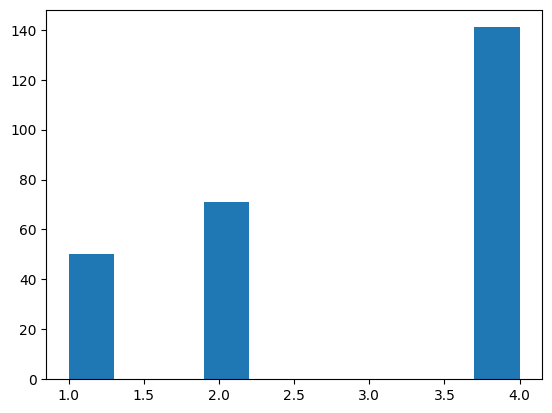

In [16]:
plt.hist(x='SNP_01', data=train)
plt.show()

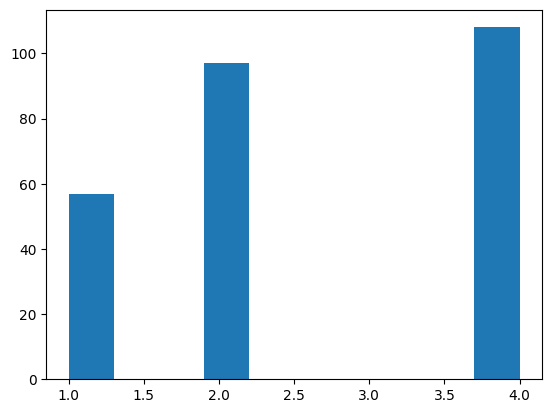

In [17]:
plt.hist(x='SNP_02', data=train)
plt.show()

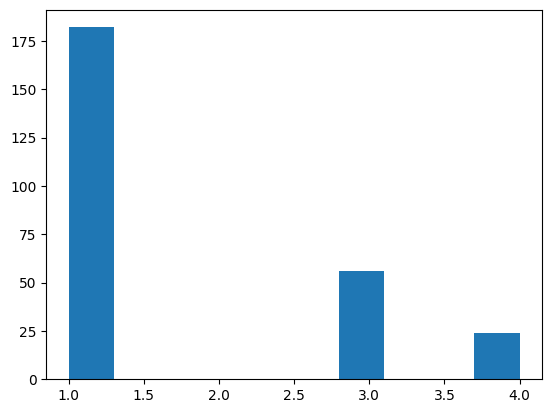

In [18]:
plt.hist(x='SNP_09', data=train)
plt.show()

In [19]:
a = list(train.columns)
a

['trait',
 'SNP_01',
 'SNP_02',
 'SNP_03',
 'SNP_04',
 'SNP_05',
 'SNP_06',
 'SNP_07',
 'SNP_08',
 'SNP_09',
 'SNP_10',
 'SNP_11',
 'SNP_12',
 'SNP_13',
 'SNP_14',
 'SNP_15',
 'class']

In [20]:
train1 = train[['trait', 'SNP_01', 'SNP_02', 'SNP_03', 'SNP_04', 'SNP_05', 'SNP_06', 'SNP_07', 'class']]
train2 = train[['SNP_08', 'SNP_09', 'SNP_10', 'SNP_11', 'SNP_12', 'SNP_13', 'SNP_14', 'SNP_15','class']]


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


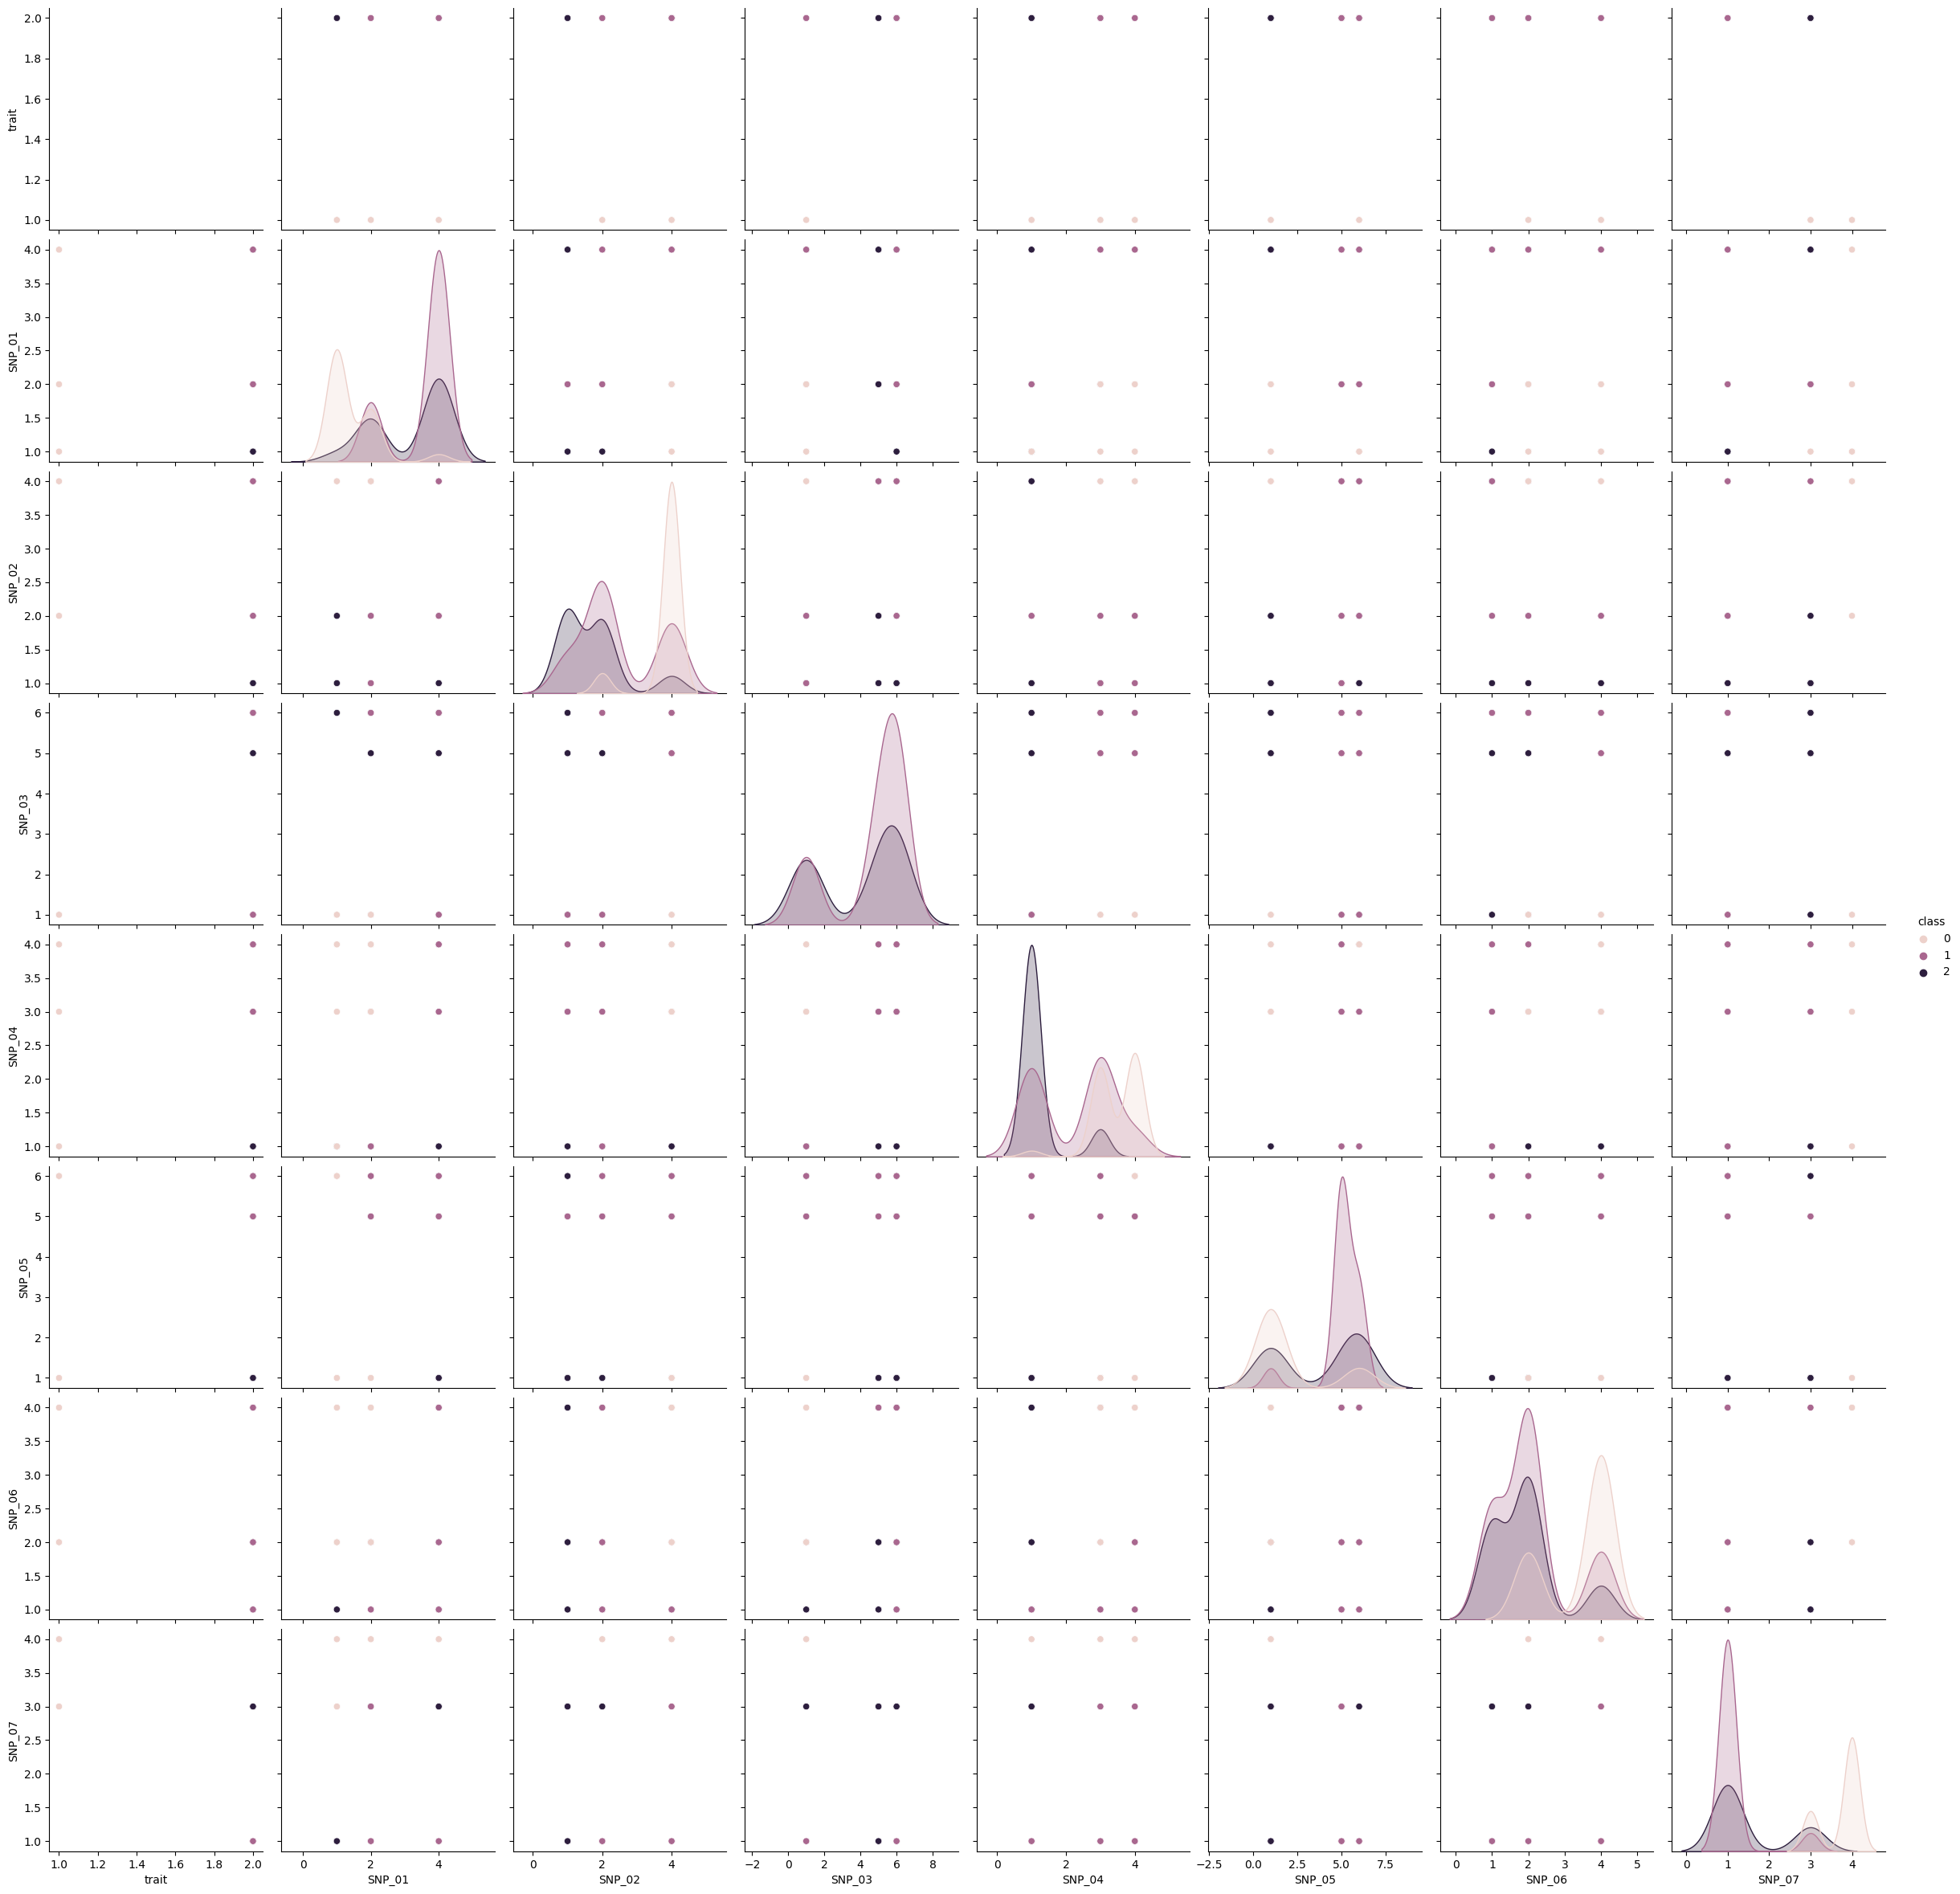

In [21]:
sns.pairplot(train1, hue='class', size=3, diag_kind='kde')
plt.show()

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


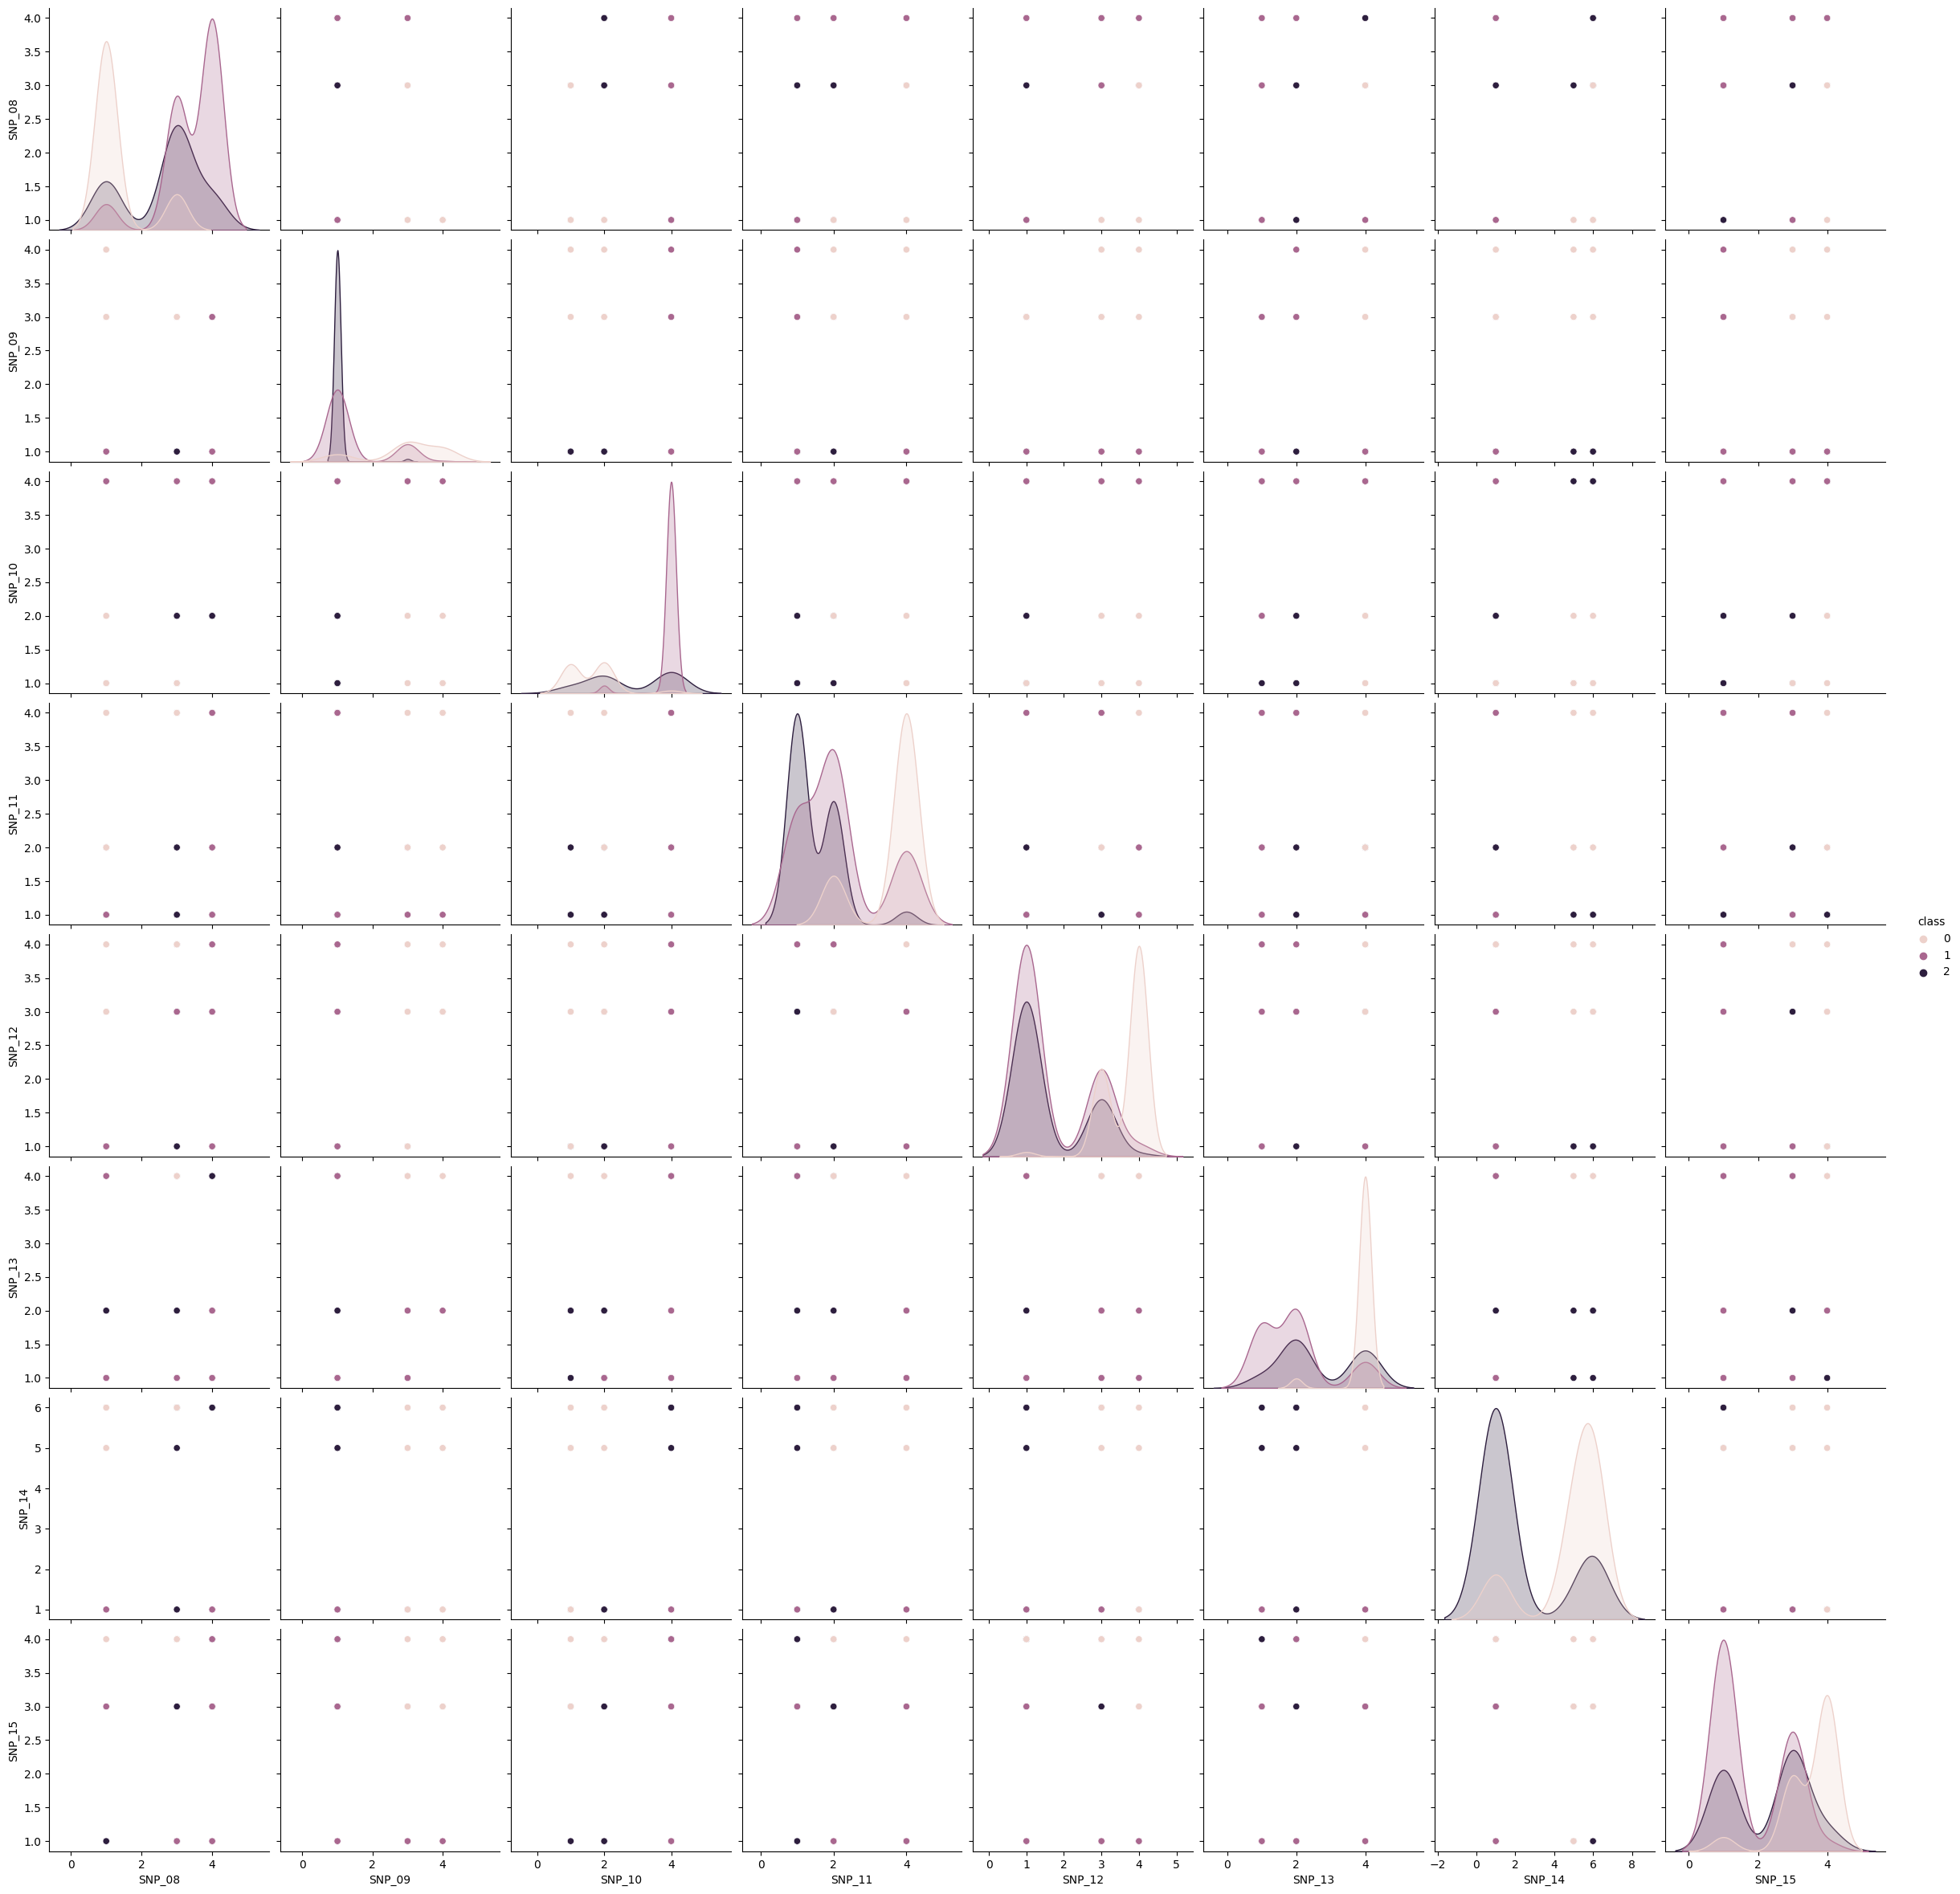

In [22]:
sns.pairplot(train2, hue='class', size=3, diag_kind='kde')
plt.show()

In [23]:
from sklearn.model_selection import train_test_split
x_data = train.loc[:,'SNP_01':'SNP_15']
y_data = train.loc[:,'class']
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, shuffle=True, random_state=20)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(209, 15) (209,)
(53, 15) (53,)


In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [25]:
y_knn_pred = knn.predict(x_test)
print("예측값:", y_knn_pred[:5])

예측값: [1 1 0 1 0]


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [26]:
from sklearn.metrics import accuracy_score
knn_acc = accuracy_score(y_test, y_knn_pred)
print(f"accuracy:{knn_acc}%")

accuracy:0.9056603773584906%


In [27]:
from sklearn import svm
# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier


# Classifiers
names = [
    "Logistic Regression",
    "KNN Classifier",
    "Decision Tree",
    "Linear SVM",
    "Random Forest",
    "SGD Classifier",
    "Ridge Classifier",
    "XGBoost",
    "AdaBoost",
]

models = [
    LogisticRegression(max_iter = 1000),
    KNeighborsClassifier(n_neighbors = 149, n_jobs = -1),
    DecisionTreeClassifier(),
    svm.SVC(kernel = 'linear'),
    RandomForestClassifier(n_estimators = 100),
    SGDClassifier(loss = 'hinge'),
    RidgeClassifier(),
    XGBClassifier(),
    AdaBoostClassifier(),
]

In [28]:
import time
# Function to return summary of baseline models
def score(X_train, y_train, X_val, y_val, names = names, models = models):
    score_df, score_train, score_val = pd.DataFrame(), [], []
    x = time.time()
    for model in models:
        model.fit(X_train, y_train)
        y_train_pred, y_val_pred = model.predict(X_train), model.predict(X_val)
        score_train.append(accuracy_score(y_train, y_train_pred))
        score_val.append(accuracy_score(y_val, y_val_pred))
    
    score_df["Classifier"], score_df["Training accuracy"], score_df["Validation accuracy"] = names, score_train, score_val
    score_df.sort_values(by = 'Validation accuracy', ascending = False, inplace = True)
    return score_df

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

In [30]:
score(x_train, y_train, X_test, y_test, names = names, models = models)

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, a

,Classifier,Training accuracy,Validation accuracy
1,KNN Classifier,0.435407,0.433962
0,Logistic Regression,0.440191,0.415094
5,SGD Classifier,0.411483,0.415094
6,Ridge Classifier,0.440191,0.396226
3,Linear SVM,0.449761,0.377358
4,Random Forest,0.985646,0.339623
7,XGBoost,0.985646,0.301887
8,AdaBoost,0.521531,0.283019
2,Decision Tree,0.985646,0.264151
